In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('C:/Users/mreza/Documents/data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [3]:
df_analyse.sort_values('date',ascending=True).tail()

,date,Italy,US,Spain,Germany,"Korea, South"
908,2022-07-18,20177910,89712243,13090476,29853680,18861593
909,2022-07-19,20299013,89830497,13132159,29994679,18937971
910,2022-07-20,20385814,90046261,13132159,30131303,19009080
911,2022-07-21,20467349,90200438,13132159,30239122,19077659
912,2022-07-22,20539016,90367064,13204863,30331131,19146180


In [4]:
df_analyse.sort_values('date',ascending=True)

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3
...,...,...,...,...,...,...
908,2022-07-18,20177910,89712243,13090476,29853680,18861593
909,2022-07-19,20299013,89830497,13132159,29994679,18937971
910,2022-07-20,20385814,90046261,13132159,30131303,19009080
911,2022-07-21,20467349,90200438,13132159,30239122,19077659


## Nice mathematical explanation of the differential SIR 
### https://www.youtube.com/watch?v=NKMHhm2Zbkw

Simin's note: I watched the video! It was totally helpful, explaining the 3 differential equations. Also, the mathematician guy, answered 3 major questions by the help of the equations, calculation, and math.

In [5]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
#beta=0.2     # Simin's note: You can see the result shows a very slow spread.
#beta=0.8    # Simin's note: In 20 days, most of the half of the population will be infected.
#beta=0.05   # Simin's note: if beta<gamma i.e. the infection rate<recovery rate then, the model has no chance to start.
                            #In other words: we have no spread.
gamma=0.1  # recovery rate

# beta/gamma<1 means there is no spread virus.
# beta/gamma>1 means there is spread.

# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [6]:
I0

21

In [7]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR                   # Simin's note: S: susceptible, I: Infected, R: Removed (died or recovered)
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to calculate SIR curves

In [8]:
SIR=np.array([S0,I0,R0])
SIR

array([999979,     21,      0], dtype=int64)

In [9]:
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})
propagation_rates

,susceptible,infected,recovered


In [10]:
for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\2207597722.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [11]:
SIR

array([ 15604.71848095,   3101.30882323, 981293.97269582])

In [12]:
propagation_rates

,susceptible,infected,recovered
0,999970.600176,27.299824,2.1
1,999959.680568,35.48945,4.829982
2,999945.485361,46.135712,8.378927
3,999927.032082,59.97542,12.992499
4,999903.043664,77.966295,18.990041
5,999871.86017,101.35316,26.78667
6,999831.324101,131.753913,36.921986
7,999778.631425,171.271198,50.097377
8,999710.138112,222.637391,67.224497
9,999621.108969,289.402795,89.488236


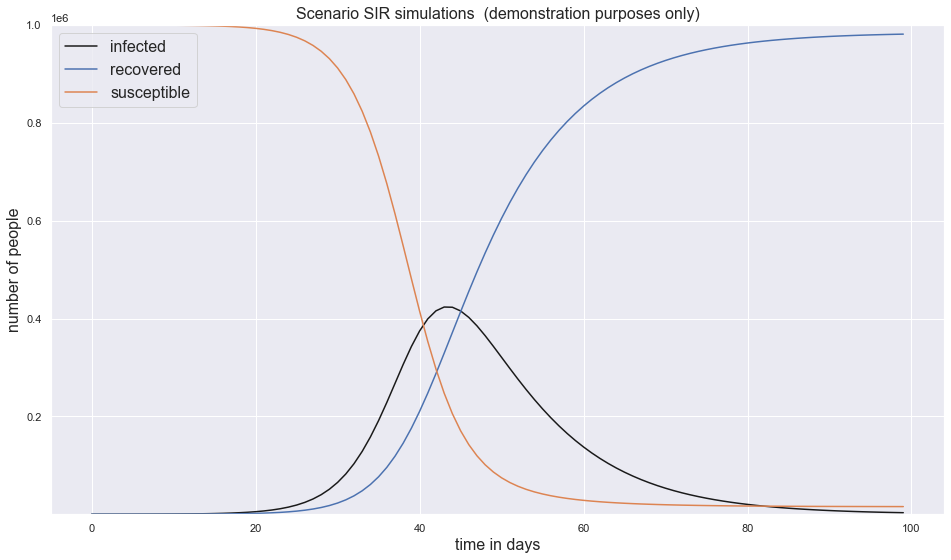

In [13]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.set_ylabel('number of people',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting data to a model

## step one: always start on simulative / constructive data

Goal is to fit a data model (SIR) model to obtain the parameters beta and gamma

## step two: cross check if the innerlogic of your parameter fitting is correct

In [14]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [15]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [16]:
## fit the data set ydata, here the simulative data set of the infected curve

ydata = propagation_rates.infected
ydata     # Simin's note: we can verify that ydata is exacly like the bell-shaped curve we saw above.
                        # It starts by 27, increases to 423509, and then decreases to  3101.

0         27.299824
1          35.48945
2         46.135712
3          59.97542
4         77.966295
5         101.35316
6        131.753913
7        171.271198
8        222.637391
9        289.402795
10       376.179773
11        488.95928
12       635.520911
13       825.963531
14      1073.390998
15      1394.796687
16      1812.201743
17      2354.115223
18      3057.399381
19      3969.639376
20      5152.131558
21      6683.614252
22      8664.861892
23     11224.234446
24     14524.197354
25     18768.667878
26     24210.749608
27     31159.914917
28     39986.895542
29     51123.358267
30     65051.853216
31     82279.692642
32    103288.924007
33    128454.684223
34    157928.157355
35    191490.873705
36    228405.847621
37    267315.023689
38     306249.76326
39    342811.283853
40    374524.773054
41    399285.431076
42    415746.751336
43    423509.160613
44    423058.618982
45    415518.030834
46    402333.606739
47    385002.265633
48    364890.575642
49    343145.555587


In [17]:
t=np.arange(len(ydata))
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [18]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\mreza\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00087012 0.00074078]  start infect: 27.299823600000003
Optimal parameters: beta = 0.3733776898153585  and gamma =  0.09619919089838559


In [19]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)
fitted

array([2.10000000e+01, 2.77071774e+01, 3.65564139e+01, 4.82317099e+01,
       6.36354024e+01, 8.39578002e+01, 1.10768989e+02, 1.46139826e+02,
       1.92801354e+02, 2.54354734e+02, 3.35547555e+02, 4.42637184e+02,
       5.83868110e+02, 7.70098128e+02, 1.01561827e+03, 1.33922376e+03,
       1.76560818e+03, 2.32717049e+03, 3.06634298e+03, 4.03856633e+03,
       5.31604957e+03, 6.99244918e+03, 9.18856586e+03, 1.20590611e+04,
       1.57999948e+04, 2.06566115e+04, 2.69301773e+04, 3.49816893e+04,
       4.52289146e+04, 5.81315632e+04, 7.41579355e+04, 9.37261703e+04,
       1.17116071e+05, 1.44355516e+05, 1.75099546e+05, 2.08537257e+05,
       2.43372465e+05, 2.77915887e+05, 3.10292773e+05, 3.38721346e+05,
       3.61781422e+05, 3.78594188e+05, 3.88872998e+05, 3.92856187e+05,
       3.91167562e+05, 3.84656932e+05, 3.74259286e+05, 3.60891057e+05,
       3.45385685e+05, 3.28461745e+05, 3.10714039e+05, 2.92618814e+05,
       2.74546362e+05, 2.56776502e+05, 2.39514241e+05, 2.22904176e+05,
      

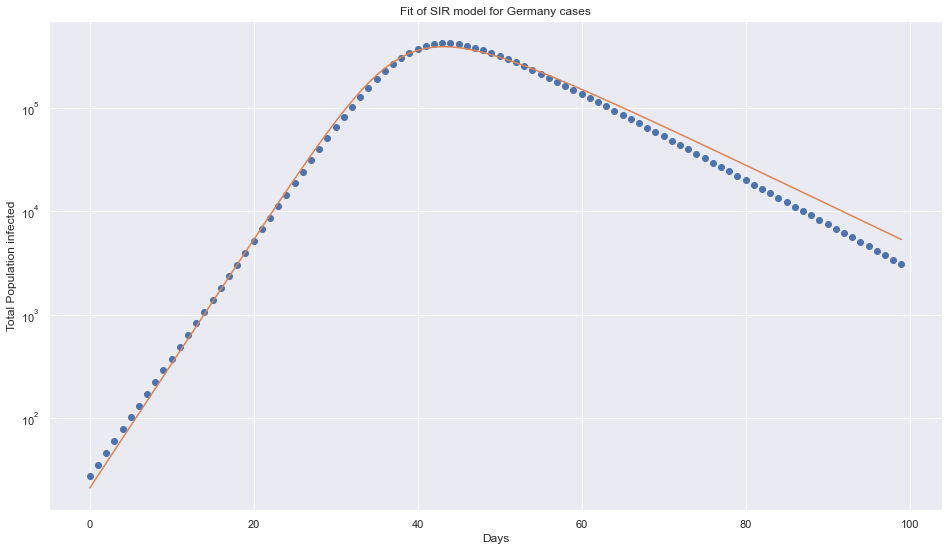

Optimal parameters: beta = 0.3733776898153585  and gamma =  0.09619919089838559
Basic Reproduction Number R0  3.881297611013738
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [20]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
#plt.semilogy(fitted)

plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Total Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Fitting the parameters of SIR model

The SIR model is assuming a very simplistic curve however we can find situations (time windows) where the model might apply

In [21]:
df_analyse

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3
...,...,...,...,...,...,...
908,2022-07-18,20177910,89712243,13090476,29853680,18861593
909,2022-07-19,20299013,89830497,13132159,29994679,18937971
910,2022-07-20,20385814,90046261,13132159,30131303,19009080
911,2022-07-21,20467349,90200438,13132159,30239122,19077659


### slice out some true data of Germany

In [22]:
#df_analyse.Germany[40:]

In [23]:
#df_analyse.Germany[40:150]

In [24]:
ydata = np.array(df_analyse.Germany[35:135])
#ydata

In [25]:
t=np.arange(len(ydata))
#t

In [26]:
# ensure re-initialization 
# attenion when slicing gout only a time window 
# (one Corana wave) the overall N0 is not the full popoulation size 
N0=80000000

I0=ydata[0]
S0=N0-I0
R0=0
print('start infected:',I0)
print('cumulative sum of infected after period',ydata[-1])
print('Number of days',len(ydata))
print('N0',N0)

start infected: 21
cumulative sum of infected after period 182764
Number of days 100
N0 80000000


In [27]:
## get the model parameters / fit the model
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
fitted=fit_odeint(t, *popt)

C:\Users\mreza\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.05077603 0.05076418]  start infect: 21
Optimal parameters: beta = 1.7815454105343755  and gamma =  1.6473432380660251


C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\mreza\AppData\Local\Temp\ipykernel_12236\649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\mreza\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


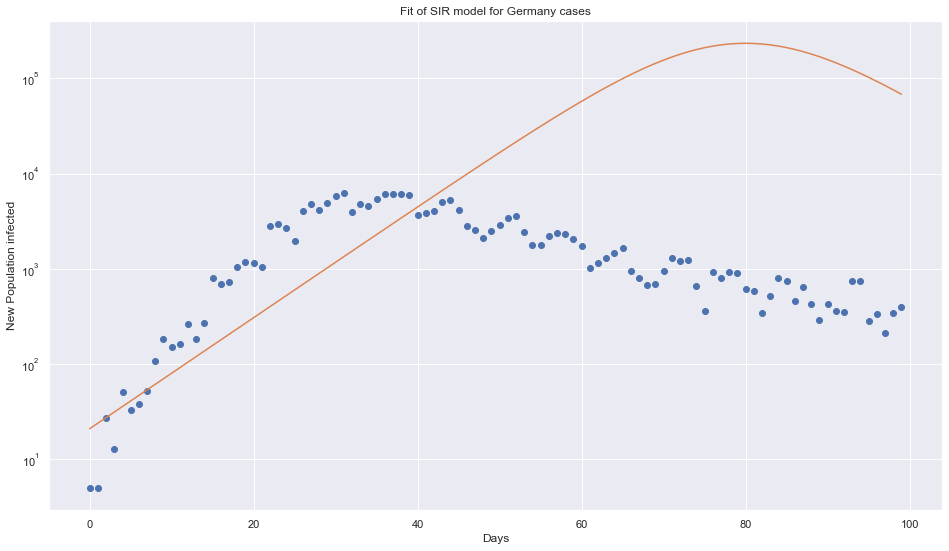

Optimal parameters: beta = 1.7815454105343755  and gamma =  1.6473432380660251
Basic Reproduction Number R0  1.0814658228881937
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [28]:
# option 1: ydata is cummulative, thus we need cumulative fitted line
#plt.semilogy(t, ydata, 'o') 
#plt.semilogy(t, np.cumsum(fitted))

# option2: ydata is cummulative, however we would like to have the day to day difference
plt.semilogy(t,np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), 'o')
plt.semilogy(t, fitted)

plt.title("Fit of SIR model for Germany cases")
plt.ylabel("New Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

### slice out some true data of Italy

In [29]:
#df_analyse.Italy[40:]

In [30]:
#df_analyse.Italy[40:150]

In [31]:
ydata = np.array(df_analyse.Italy[35:135])
#ydata

In [32]:
t=np.arange(len(ydata))
#t

In [33]:
# ensure re-initialization 
# attenion when slicing gout only a time window 
# (one Corana wave) the overall N0 is not the full popoulation size 
N0=80000000

I0=ydata[0]
S0=N0-I0
R0=0
print('start infected:',I0)
print('cumulative sum of infected after period',ydata[-1])
print('Number of days',len(ydata))
print('N0',N0)

start infected: 453
cumulative sum of infected after period 234013
Number of days 100
N0 80000000


In [34]:
## get the model parameters / fit the model
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
fitted=fit_odeint(t, *popt)

standard deviation errors :  [0.02634385 0.02599452]  start infect: 453
Optimal parameters: beta = 1.213354096394848  and gamma =  1.1124187419882432


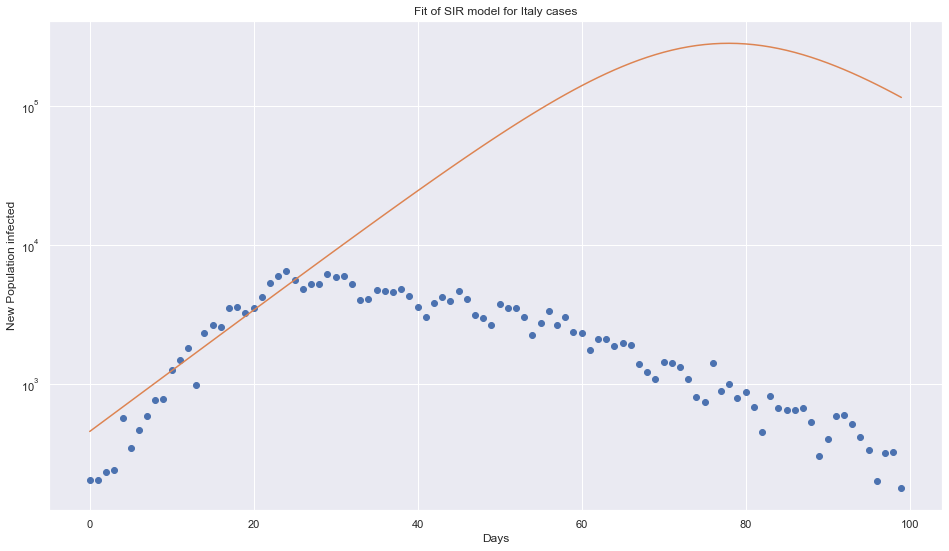

Optimal parameters: beta = 1.213354096394848  and gamma =  1.1124187419882432
Basic Reproduction Number R0  1.0907350358249102
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [35]:
# option 1: ydata is cummulative, thus we need cumulative fitted line
#plt.semilogy(t, ydata, 'o') 
#plt.semilogy(t, np.cumsum(fitted))

# option2: ydata is cummulative, however we would like to have the day to day difference
plt.semilogy(t,np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), 'o')
plt.semilogy(t, fitted)

plt.title("Fit of SIR model for Italy cases")
plt.ylabel("New Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

### slice out some true data of Spain

In [36]:
#df_analyse.Spain[40:]

In [37]:
#df_analyse.Spain[40:150]

In [38]:
ydata = np.array(df_analyse.Spain[35:135])
#ydata

In [39]:
t=np.arange(len(ydata))
#t

In [40]:
# ensure re-initialization 
# attenion when slicing gout only a time window 
# (one Corana wave) the overall N0 is not the full popoulation size 
N0=80000000

I0=ydata[0]
S0=N0-I0
R0=0
print('start infected:',I0)
print('cumulative sum of infected after period',ydata[-1])
print('Number of days',len(ydata))
print('N0',N0)

start infected: 13
cumulative sum of infected after period 240660
Number of days 100
N0 80000000


In [41]:
## get the model parameters / fit the model
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
fitted=fit_odeint(t, *popt)

C:\Users\mreza\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.05072286 0.05085131]  start infect: 13
Optimal parameters: beta = 1.6480893453371515  and gamma =  1.5041714199511125


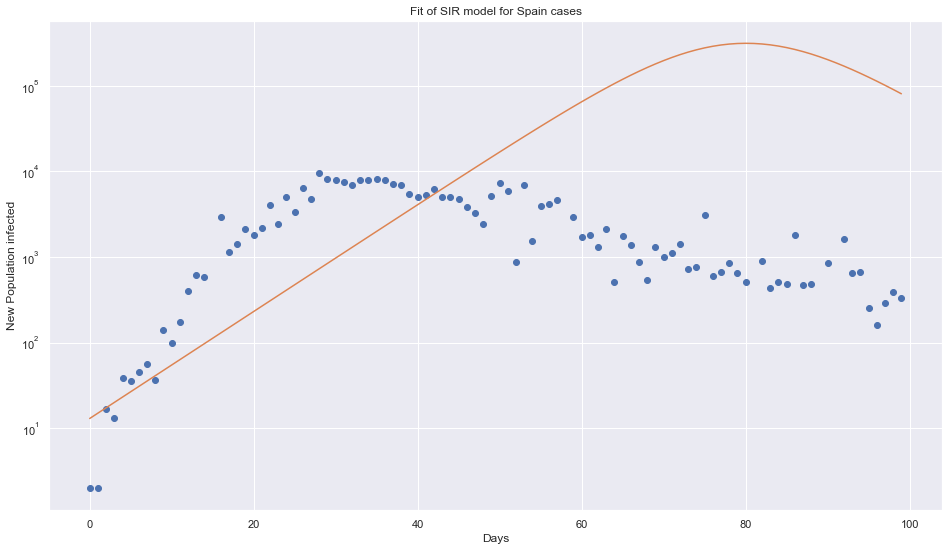

Optimal parameters: beta = 1.6480893453371515  and gamma =  1.5041714199511125
Basic Reproduction Number R0  1.095679204828075
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [42]:
# option 1: ydata is cummulative, thus we need cumulative fitted line
#plt.semilogy(t, ydata, 'o') 
#plt.semilogy(t, np.cumsum(fitted))

# option2: ydata is cummulative, however we would like to have the day to day difference
plt.semilogy(t,np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), 'o')
plt.semilogy(t, fitted)

plt.title("Fit of SIR model for Spain cases")
plt.ylabel("New Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Dashboard

In [63]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os
print(os.getcwd())
df_input_large=pd.read_csv('C:/Users/mreza/Documents/data/processed/COVID_final_set_Evaluation_Walk_through.csv',sep=';')


fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Applied Data Science on COVID-19 data (SIR Modeling)

    ### Here, we can see a dashboard for SIR modeling of three countries: Germany, Italy, and spain. 

    '''),

    dcc.Markdown('''
    ## Multi-Select Country for visualization (SIR Modeling)
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        #options=['Germany','Italy','Spain'],    # Simin's note: added by me
        options=['Spain'],
        #value=['Germany','Italy','Spain'],      # Simin's note: added by me
        value=['Spain'],
        #options=[ {'label': each,'value':each} for each in df_input_large['country'].unique()],
        #value=['Germany','Italy','Spain'], # which are pre-selected
        multi=True
    ),

    dcc.Markdown('''
        ## Select Timeline of confirmed COVID-19 cases or the approximated doubling time
        '''),


    dcc.Dropdown(
    id='doubling_time',
    options=[
        #{'label': 'Timeline Confirmed ', 'value': 'confirmed'},
        #{'label': 'Timeline Confirmed Filtered', 'value': 'confirmed_filtered'},
        #{'label': 'Timeline Doubling Rate', 'value': 'confirmed_DR'},
        #{'label': 'Timeline Doubling Rate Filtered', 'value': 'confirmed_filtered_DR'},
        {'label': 'Days', 'value': 't'},   # Simin's note: added by me
    ],
    value='confirmed',
    multi=False
    ),

    dcc.Graph(figure=fig, id='main_window_slope')
])



@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value'),
    Input('doubling_time', 'value')])
def update_figure(country_list):

    traces = []
    
    for each in country_list:
        
        
        df_plot=df_input_large[df_input_large['country']==each]

        
        
        traces.append(dict( x=df_plot.date,
                                #y=df_plot[each, 'ydata'],
                                y=ydata,
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4,
                                name="Real data {}".format(each)
                        )
                )

        traces.append(dict( x=df_plot.date,
                                #y=df_plot[each, 'fitted'],
                                y=fitted,
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=3,
                                name="SIR data {}".format(each)
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Days",
                yaxis_title="Infected People",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                
                yaxis={'type':"log",
                       'range':'[1.1,8,8]'
                    
                },
        )
    }

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False)

C:\Users\mreza\Simin_Python_Codes
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
